Loading Stress Calculations using Monte Carlo Simulations

Import Packages

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import random

Input Random Variables, F, a, b in terms of the Normal Distribution Parameters

In [94]:
# Input Random Variables
muF = 100000
sigmaF=10000
muA = 0.03
sigmaA = 0.00027
muB = 0.05
sigmaB = 0.00045


Input Number of Trial Runs in Monte Carlo Simulation

In [95]:
N = 1000000 # number of simulations for MCS
L_array = np.zeros(N)


Equations for Random Sampling and Loading Stress

In [96]:
def random_sampling_eq(mu,sigma,u):
    return (mu - (3.1394473*sigma) + (((mu+(0.3530184*sigma))-(mu - (3.1394473*sigma)))*np.power((-np.log(1-u)),0.2907)))
    
def loading_stress_eq(F,a,b):
    return ((F/(a*b)) * 0.000001)  # Loading stress in MPa


Generate random numbers for MCS

In [97]:
xrand = np.zeros([N, 3])

for row in xrand:
    for col in range(3):
        row[col] = random.random()

print(xrand)
print(xrand.shape)

[[0.78962484 0.6567381  0.7092816 ]
 [0.77137974 0.84564334 0.13716549]
 [0.16932988 0.86978832 0.02400218]
 ...
 [0.57236863 0.29629533 0.90243734]
 [0.76661209 0.93426245 0.39007783]
 [0.07052128 0.55544505 0.49493544]]
(1000000, 3)


Run Monte Carlo Simulation

In [98]:
for i in range(N):
    F = random_sampling_eq(muF,sigmaF,xrand[i,0])
    a = random_sampling_eq(muA,sigmaA,xrand[i,1])
    b = random_sampling_eq(muB,sigmaB,xrand[i,2])
    L = loading_stress_eq(F,a,b)
    L_array[i] = L
print(L_array)
    




[71.58440144 71.87259692 60.45013094 ... 67.48283411 70.91360457
 56.55450801]


Plot Histogram

The mean loading stress, "μL" is 66.68 MPa 
The mean loading stress, "σL" is 6.78 MPa 


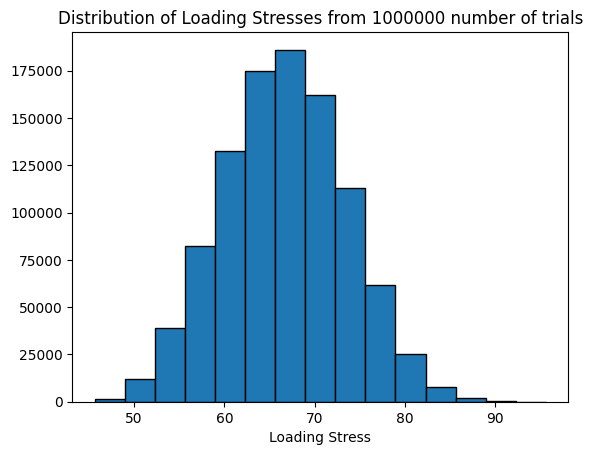

In [99]:
plt.title(f'Distribution of Loading Stresses from {N} number of trials')
plt.hist(L_array, bins=15,ec='black')
plt.xlabel('Loading Stress')

# Find mean and standard deviation
Lmean = np.mean(L_array)
Lstd = np.std(L_array)
print(f'The mean loading stress, "\u03bcL" is {np.round(Lmean,2)} MPa ' )
print(f'The mean loading stress, "\u03C3L" is {np.round(Lstd,2)} MPa ' )
